### Import dependencies

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
from skimage.transform import resize
from skimage.io import imshow
from PIL import Image

Define global variables

In [2]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNEL = 3

### Reading and preprocessing images and masks

In [3]:
# get the address of the images and masks from the folders
def get_files_addresses(path):
    address_list = []
    os.chdir(path) 
    for file in os.listdir():                # save the image passes in a list
        file_path = f"{path}/{file}"
        address_list.append(file_path)
    
    return address_list

Reading images and masks

In [5]:
image_add = get_files_addresses("C:\\Users\\ASC\\OneDrive\\Desktop\\temp\\kvasir-seg\\Kvasir-SEG\\images")
mask_add = get_files_addresses("C:\\Users\\ASC\\OneDrive\\Desktop\\temp\\kvasir-seg\\Kvasir-SEG\\masks")

images, masks = [], []

for img in image_add:
    img1 = cv2.imread(img)
    images.append(img1)

for img in mask_add:
    img1 = Image.open(img) 
    img = img1.convert('L')             # gray scale the masks
    y = np.expand_dims(img, axis=-1)
    masks.append(y)

Resize the images and masks to (128, 128), and split data to train and task

In [6]:
X_train = np.zeros((900, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), dtype=np.uint8)
Y_train = np.zeros((900, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
X_test = np.zeros((100, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), dtype=np.uint8)
Y_test = np.zeros((100, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

for i in range(900):               # 90% of the data for training
    img = images[i]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[i] = img
    mask = masks[i]
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_train[i] = mask

for i in range(900, 1000):         # 10% of the data for testing
    img = images[i]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[i-900] = img
    mask = masks[i]
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_test[i-900] = mask

Checking images and masks in train and test data

Text(0.5, 1.0, 'testing mask 73')

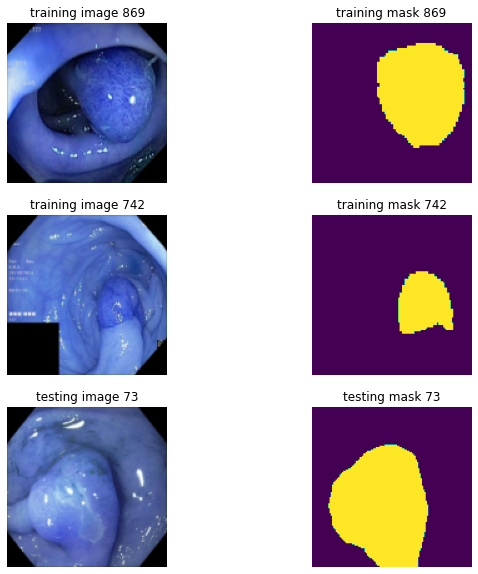

In [8]:
fig = plt.figure(figsize=(10, 10))
train_rand1 = random.randint(0, 900)
train_rand2 = random.randint(0, 900)
test_rand = random.randint(0, 100)

fig.add_subplot(3, 2, 1) 
  
# showing image 
plt.imshow(X_train[train_rand1]) 
plt.axis('off') 
plt.title(f"training image {train_rand1}") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(3, 2, 2) 
  
# showing image 
plt.imshow(Y_train[train_rand1]) 
plt.axis('off') 
plt.title(f"training mask {train_rand1}") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(3, 2, 3) 
  
# showing image 
plt.imshow(X_train[train_rand2]) 
plt.axis('off') 
plt.title(f"training image {train_rand2}") 
  
# Adds a subplot at the 4th position 
fig.add_subplot(3, 2, 4) 
  
# showing image 
plt.imshow(Y_train[train_rand2]) 
plt.axis('off') 
plt.title(f"training mask {train_rand2}") 
  
# Adds a subplot at the 5rd position 
fig.add_subplot(3, 2, 5) 
  
# showing image 
plt.imshow(X_test[test_rand]) 
plt.axis('off') 
plt.title(f"testing image {test_rand}") 
  
# Adds a subplot at the 6th position 
fig.add_subplot(3, 2, 6) 
  
# showing image 
plt.imshow(Y_test[test_rand]) 
plt.axis('off') 
plt.title(f"testing mask {test_rand}") 